# Технологии машинного обучения

# Рубежный контроль №1

# Тема: технологии разведочного анализа и обработки данных

# ИУ5-62 Грачев Ярослав Андреевич

# 4 вариант

### Импорт библиотек

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузка данных

In [8]:
data = pd.read_csv('toy_dataset.csv', sep =',')

### Описание датасета

Number: A simple index number for each row

City: The location of a person (Dallas, New York City, Los Angeles, Mountain View, Boston, Washington D.C., San Diego and Austin)

Gender: Gender of a person (Male or Female)

Age: The age of a person (Ranging from 25 to 65 years)

Income: Annual income of a person (Ranging from -674 to 177175)

Illness: Is the person Ill? (Yes or No)

### Предварительный анализ

In [9]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [10]:
data.shape

(150000, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [12]:
data.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


### Корреляционный анализ

In [13]:
corr_matrix = data.corr()

In [14]:
data.corr(method='pearson')['Income']

Number    0.410460
Age      -0.001318
Income    1.000000
Name: Income, dtype: float64

In [15]:
data.corr(method='kendall')['Income']

Number    0.194147
Age      -0.000978
Income    1.000000
Name: Income, dtype: float64

In [16]:
data.corr(method='spearman')['Income']

Number    0.286131
Age      -0.001452
Income    1.000000
Name: Income, dtype: float64

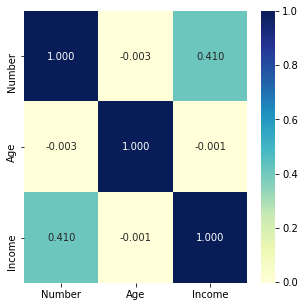

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.3f')

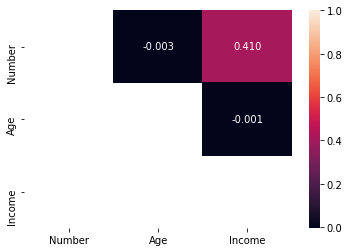

In [18]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

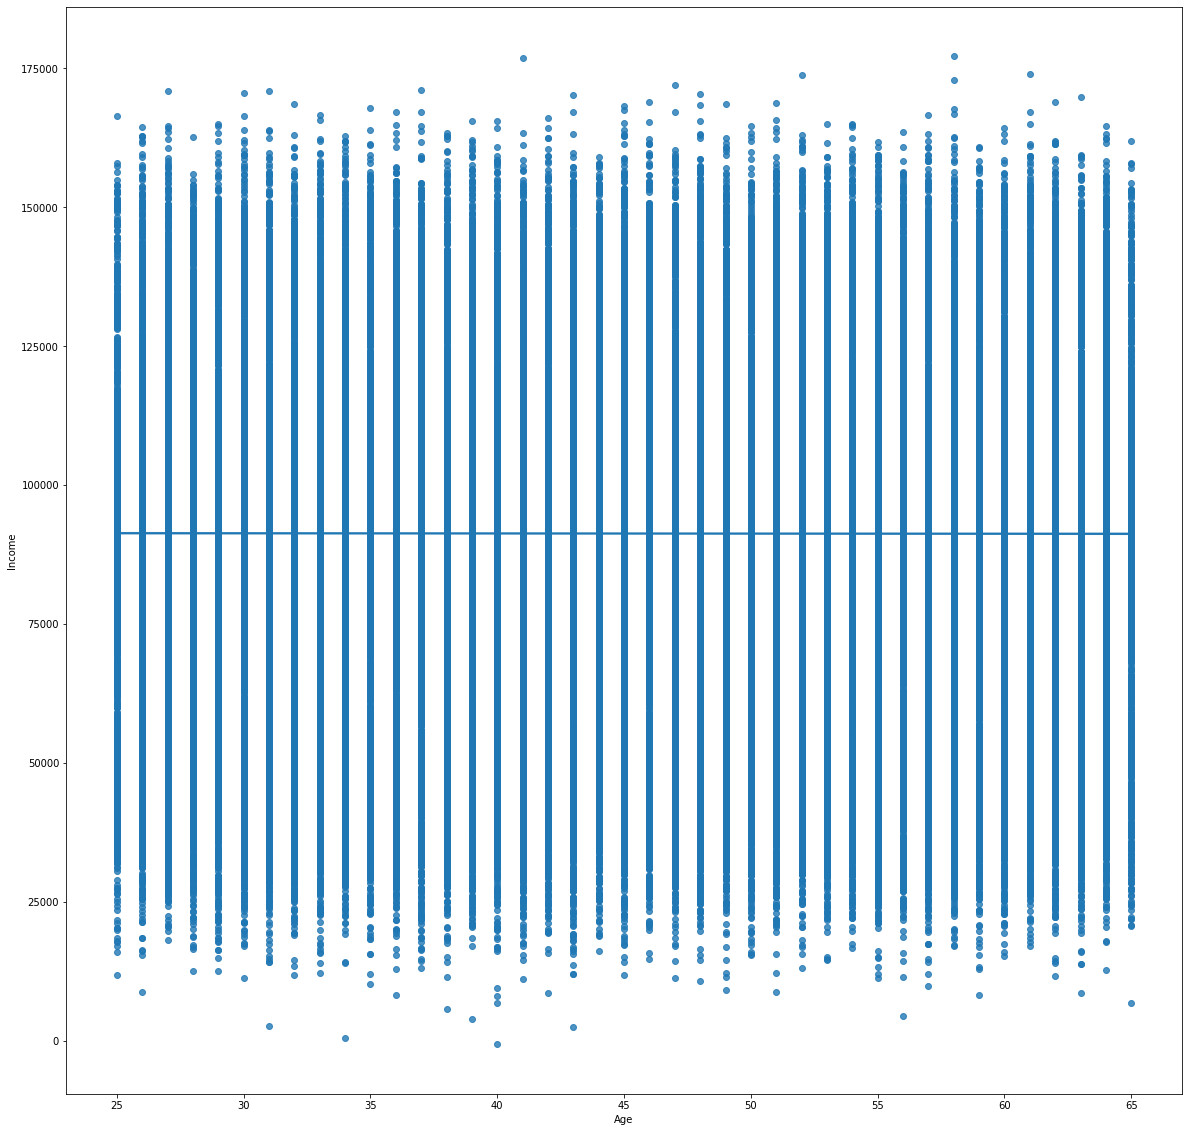

In [19]:
fig, axs = plt.subplots(figsize=(20,20))
sns.regplot(data['Age'], data['Income'])

Таким образом мы видим, что целевой признак, в данном случае "Income" (годовой доход) не сильно коррелирует с признаком "Age"

# "Гистограмма"

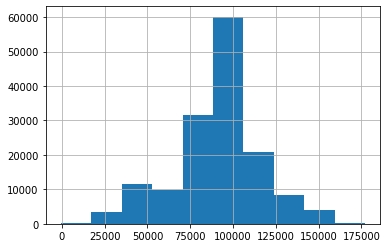

In [20]:
h = data['Income'].hist()
fig = h.get_figure()